In [1]:
# Risk vs returns

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


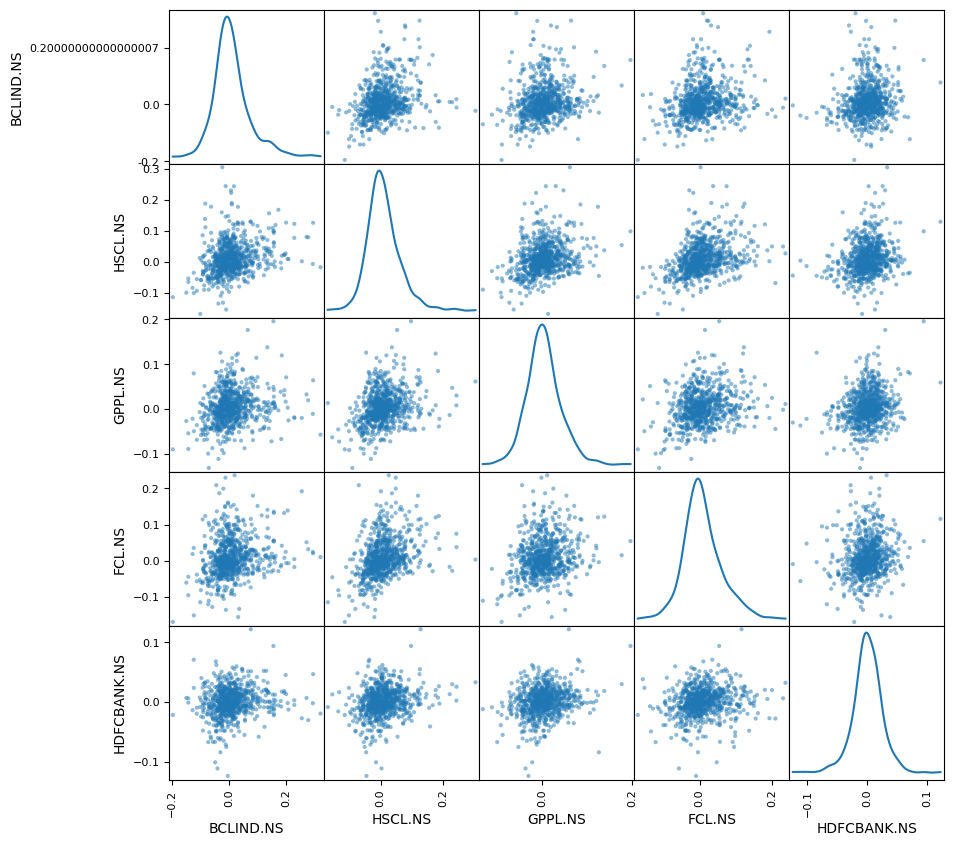

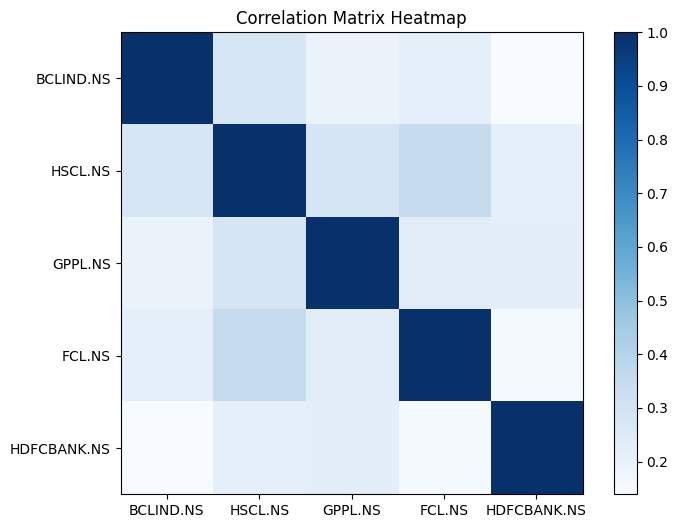

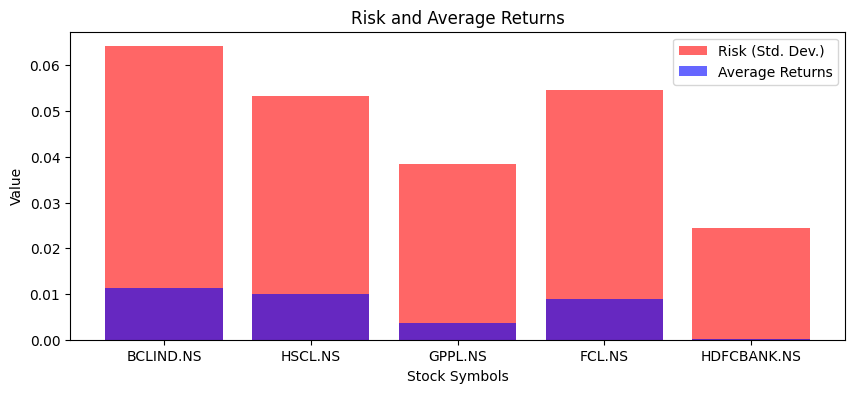

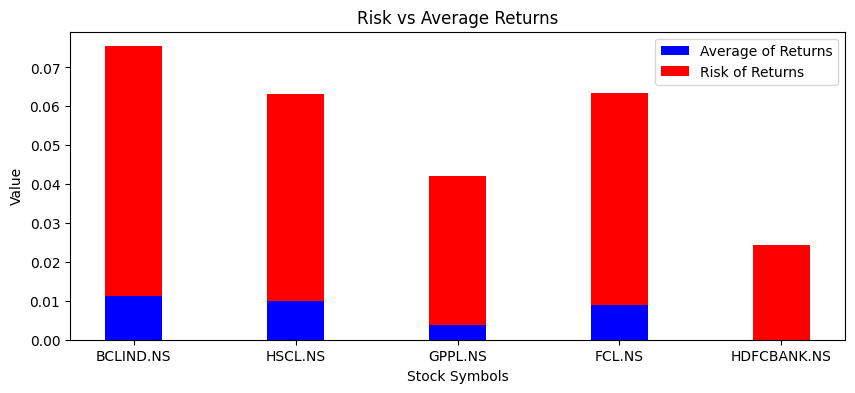

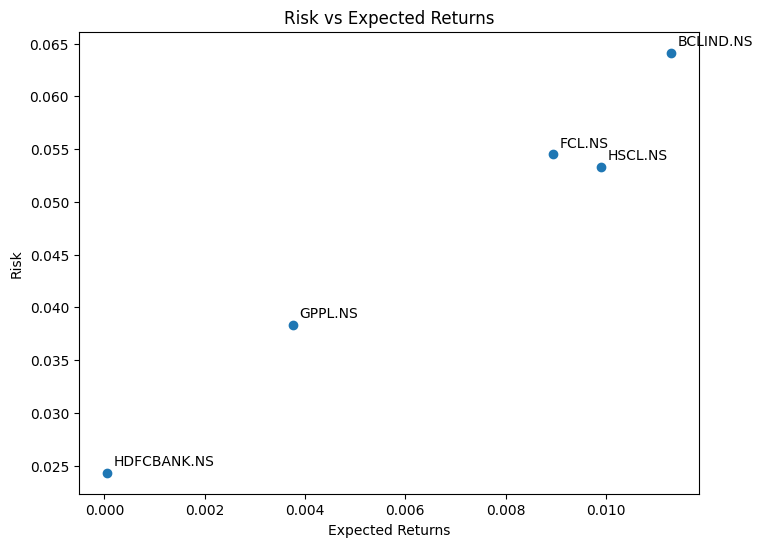

Table: Risk vs Expected Returns
                 Risk  Expected Returns
BCLIND.NS    0.064132          0.011290
HSCL.NS      0.053348          0.009902
GPPL.NS      0.038361          0.003751
FCL.NS       0.054536          0.008947
HDFCBANK.NS  0.024327          0.000051


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# Setting stock symbols and time range
symbols = ['BCLIND.NS', 'HSCL.NS', 'GPPL.NS', 'FCL.NS', 'HDFCBANK.NS']
start = dt.date.today() - dt.timedelta(days=365*3)
end = dt.date.today()

# Downloading and processing stock data
df = pd.DataFrame()
for symbol in symbols:
    df[symbol] = yf.download(symbol, start=start, end=end)['Adj Close']

# Dropping rows with missing values
df = df.dropna()

# Calculating percentage change in stock prices
rets = df.pct_change(periods=3)

# Plotting scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(rets, diagonal='kde', figsize=(10, 10))

# Creating correlation matrix heatmap
corr = rets.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Plotting bar charts for risk and average returns
plt.figure(figsize=(10, 4))
plt.bar(rets.columns, rets.std(), color='red', alpha=0.6, label='Risk (Std. Dev.)')
plt.bar(rets.columns, rets.mean(), color='blue', alpha=0.6, label='Average Returns')
plt.title("Risk and Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Value")
plt.legend()
plt.show()

# Stacked bar chart for risk vs return
plt.figure(figsize=(10, 4))
width = 0.35
ind = np.arange(len(symbols))
plt.bar(ind, rets.mean(), width, color='blue', label='Average of Returns')
plt.bar(ind, rets.std(), width, bottom=rets.mean(), color='red', label='Risk of Returns')
plt.ylabel('Value')
plt.xlabel('Stock Symbols')
plt.title('Risk vs Average Returns')
plt.xticks(ind, symbols)
plt.legend()
plt.show()

# Scatter plot for expected returns vs risk
plt.figure(figsize=(8, 6))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points')
plt.title('Risk vs Expected Returns')
plt.show()

# Display table with risk vs expected returns
risk_returns_table = pd.DataFrame({'Risk': rets.std(), 'Expected Returns': rets.mean()})
print("Table: Risk vs Expected Returns")
print(risk_returns_table)